In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [3]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# 데이터 불러오기
gdp = pd.read_excel('./data/연도별_GDP_증가율.xls',skipfooter=10)
gdp

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1인당 실질 국민총소득(만 원),"2,832","2,900","2,998","3,083","3,260","3,391","3,493","3,532","3,532","3,530","3,656"
1,전년 대비 증가율(%),0.8,2.4,3.4,2.8,5.8,4.0,3.0,1.1,0.0,-0.1,3.6


In [5]:
# column명 재정의
gdp = gdp.rename(columns={'Unnamed: 0' : '연도'})
gdp

,연도,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1인당 실질 국민총소득(만 원),"2,832","2,900","2,998","3,083","3,260","3,391","3,493","3,532","3,532","3,530","3,656"
1,전년 대비 증가율(%),0.8,2.4,3.4,2.8,5.8,4.0,3.0,1.1,0.0,-0.1,3.6


In [6]:
# 데이터 전처리(결측치, 이상치)
gdp.info()
gdp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      2 non-null      object
 1   2011    2 non-null      object
 2   2012    2 non-null      object
 3   2013    2 non-null      object
 4   2014    2 non-null      object
 5   2015    2 non-null      object
 6   2016    2 non-null      object
 7   2017    2 non-null      object
 8   2018    2 non-null      object
 9   2019    2 non-null      object
 10  2020    2 non-null      object
 11  2021    2 non-null      object
dtypes: object(12)
memory usage: 320.0+ bytes


,연도,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2,2,2,2,2,2,2,2,2,2,2,2
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,1인당 실질 국민총소득(만 원),"2,832","2,900","2,998","3,083","3,260","3,391","3,493","3,532","3,532","3,530","3,656"
freq,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
# 데이터 전처리(중복치)
gdp[gdp.duplicated()]

,연도,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


In [8]:
# 데이터 정제(raw, column 변환)
gdp = gdp.T.reset_index()
gdp

,index,0,1
0,연도,1인당 실질 국민총소득(만 원),전년 대비 증가율(%)
1,2011,"2,832",0.8
2,2012,"2,900",2.4
3,2013,"2,998",3.4
4,2014,"3,083",2.8
5,2015,"3,260",5.8
6,2016,"3,391",4.0
7,2017,"3,493",3.0
8,2018,"3,532",1.1
9,2019,"3,532",0.0


In [9]:
# 데이터 정제(column명 재정의, 필요 row 추출)
gdp.columns = ['연도','GDP','증가율(%)']
gdp = gdp[6:]
gdp = gdp.reset_index(drop=True)

In [10]:
# 데이터 정제(데이터 타입변경)

# GDP컬럼 천단위 콤마 제거
gdp['GDP'] = gdp['GDP'].str[0:1]+gdp['GDP'].str[2:]

# GDP컬럼 int타입 변환
gdp['GDP'] = gdp['GDP'].astype(int)

# 증가율(%)컬럼 float타입 변환
gdp['증가율(%)'] = gdp['증가율(%)'].astype(float)

In [11]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      6 non-null      object 
 1   GDP     6 non-null      int32  
 2   증가율(%)  6 non-null      float64
dtypes: float64(1), int32(1), object(1)
memory usage: 248.0+ bytes


In [12]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      6 non-null      object 
 1   GDP     6 non-null      int32  
 2   증가율(%)  6 non-null      float64
dtypes: float64(1), int32(1), object(1)
memory usage: 248.0+ bytes


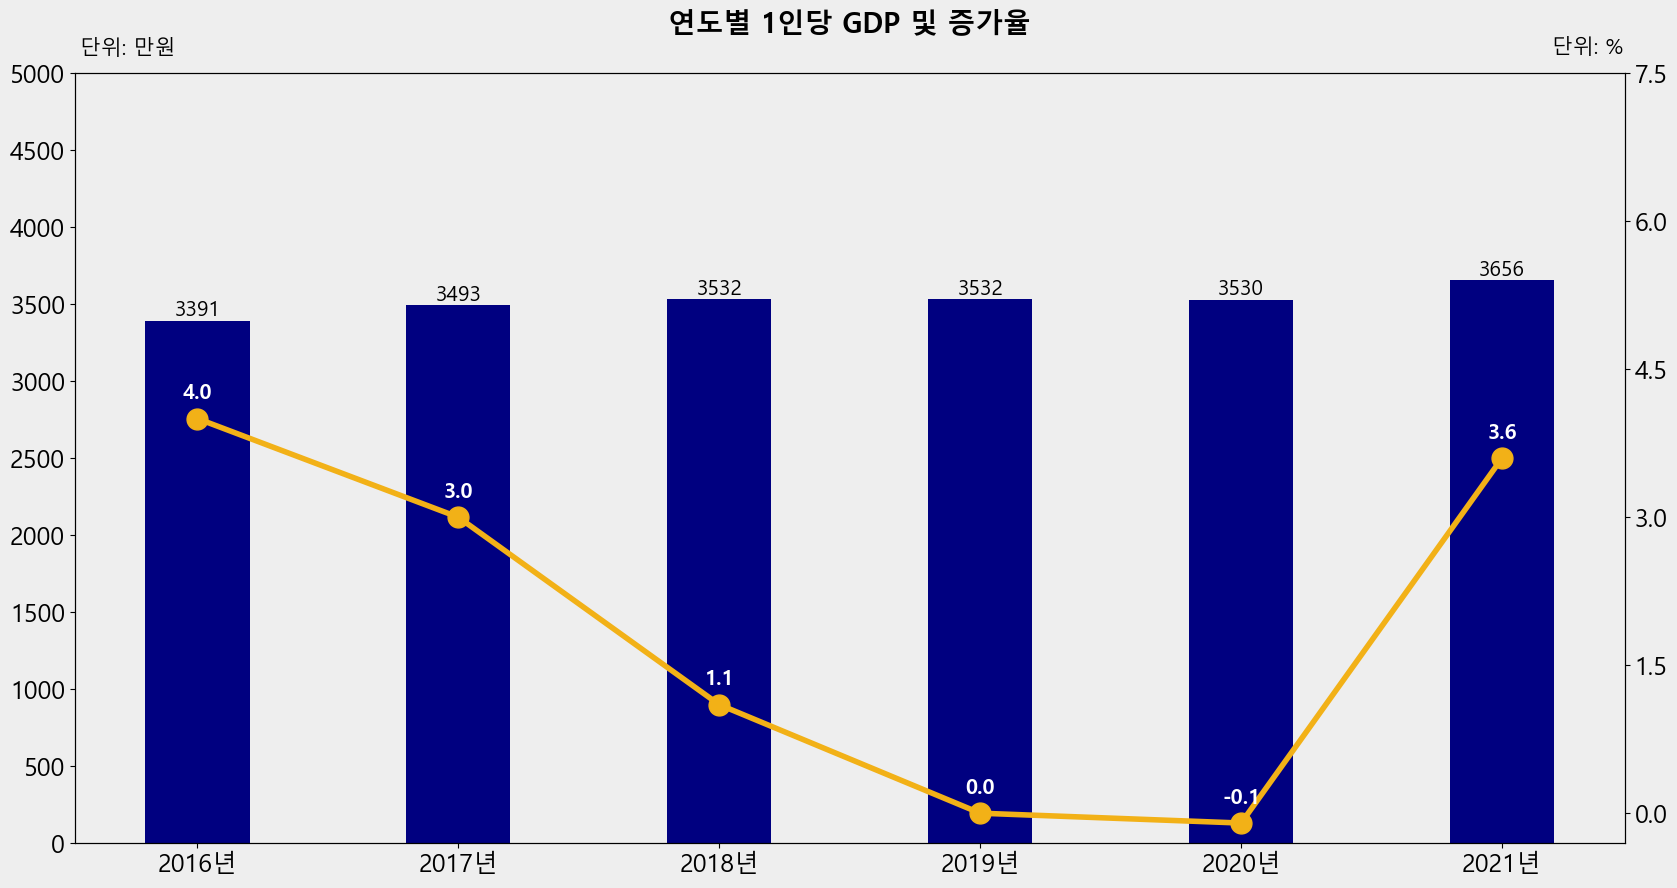

In [16]:
# 정제된 데이터 시각화(1인당 GDP)
ax1_ylist = np.arange(0,5500,500)
ax2_ylist = np.arange(0,9,1.5)

plt.rc('font', family = 'Malgun Gothic', size = 18)
fig, ax1 = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#EEEEEE')

ax1.set_title('연도별 1인당 GDP 및 증가율',fontsize = 20,loc='center', pad=30, fontweight="bold")
ax1.text(-0.45,5119, '단위: 만원', fontsize=15, color = 'black')
plt.xticks([0,1,2,3,4,5], gdp['연도']+'년')

ax1.bar(gdp['연도'],gdp['GDP'], width=0.4 ,color ='navy')
ax1.set_facecolor('#EEEEEE')
ax1.set_yticks(ax1_ylist)

# 그래프 상단에 값 추가하기
for i, v in enumerate(gdp['연도']):
    plt.text(v, gdp['GDP'][i], gdp['GDP'][i],
             fontsize = 15,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

ax2 = ax1.twinx()
ax2.plot(gdp['연도'],gdp['증가율(%)'], marker='o', ms= 15,color ='#F2B117')

plt.rcParams['lines.linewidth'] = 4

ax2.set_yticks(ax2_ylist)
ax2.text(5.19,7.7, '단위: %', fontsize=15, color = 'black')

#그래프 상단에 값 추가하기
for i in range(len(gdp['증가율(%)'])):
    height = gdp['증가율(%)'][i:i+1]
    plt.text(gdp['연도'][i:i+1], height + 0.15, '%.1f' %height, ha='center', va='bottom', 
             size = 15, color='white', fontweight='bold')

plt.show()